# Иморты и константы

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

SEED = 2021
TEST_SIZE = 0.3
NUM_TARGET_CLASSES = 2

np.random.seed(SEED)

In [44]:
DATA_FILEPATH = '../data/raw/train.csv'
FILEPATH_TO_SAVE_PROCESSED_DATA = '../data/processed/processed_data.csv'

# Посмотрим на данные

In [45]:
df = pd.read_csv(DATA_FILEPATH)

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Посмотрим на основне параметры данных

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [48]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Построим матрицу корреляций

In [50]:
corr_mat = df.corr()
top_corr_features = corr_mat.index

<AxesSubplot:>

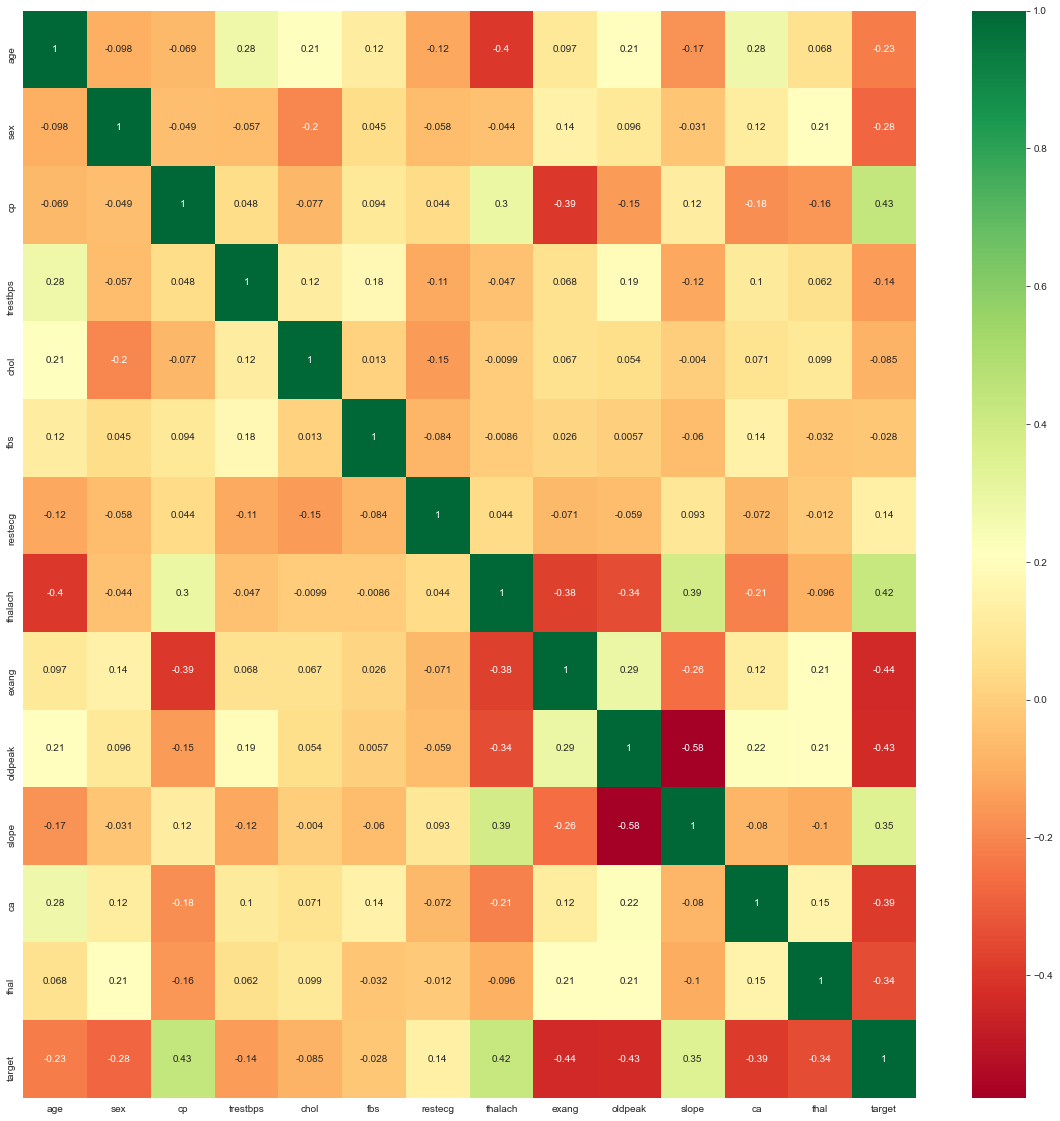

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

## Посмотрим на соотношение классов 

<AxesSubplot:xlabel='target', ylabel='count'>

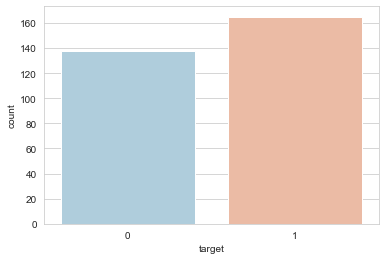

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette='RdBu_r')

## Разобьём фичи на числовые и категориальные

In [53]:
numerical_features = ['age','trestbps','chol','thalach','oldpeak']
categorical_features = []
target = 'target'

# Подготовим данные для обучения

In [54]:
# Скопируем датафрейм
prepare_df = df.copy()

## Нормируем числовые фичи

In [55]:
ss = StandardScaler()

In [56]:
prepare_df[numerical_features] = ss.fit_transform(prepare_df[numerical_features])

In [57]:
prepare_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


## Кодируем категориальные фичи

In [58]:
prepare_df = pd.get_dummies(prepare_df, columns=categorical_features)

In [59]:
prepare_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [60]:
#Сохраним обработанные данные 
# prepare_df.to_csv(FILEPATH_TO_SAVE_PROCESSED_DATA, index=False)

## Разобъём на трейн и тест  

In [61]:
X = prepare_df.drop(['target'], axis=1).values
y = prepare_df['target'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

# Обучим модель

In [63]:
# Определим функцию для подсчёта метрик
def get_metrics(y, y_pred):
    correct = accuracy_score(y, y_pred)
    print(f"Accurcay :   {correct}")
    
    cm = confusion_matrix(y, y_pred)
    total=sum(sum(cm))

    sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Sensitivity : ', sensitivity )

    specificity = cm[1,1]/(cm[1,1]+cm[0,1])
    print('Specificity : ', specificity)
    
    f1 = f1_score(y, y_pred)
    print(f"f1_score :   {f1}")
    
    roc_auc = roc_auc_score(y, y_pred)
    print(f"roc_auc_score :   {roc_auc}")

## Попробуем LogReg

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train, y_train)

LogisticRegression()

In [66]:
y_predict = model.predict(X_test)

In [67]:
get_metrics(y_test, y_predict)

Accurcay :   0.7912087912087912
Sensitivity :  0.78125
Specificity :  0.7966101694915254
f1_score :   0.8318584070796461
roc_auc_score :   0.773023023023023


## Попробуем модель RandomForest 

In [68]:
model = RandomForestClassifier(max_depth=5)

In [69]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [70]:
y_predict = model.predict(X_test)

In [71]:
get_metrics(y_test, y_predict)

Accurcay :   0.8351648351648352
Sensitivity :  0.84375
Specificity :  0.8305084745762712
f1_score :   0.8672566371681415
roc_auc_score :   0.8185685685685686
